# Recurrent Neural Networks

In [ ]:
"""
We are going to predict the stock price of Google.

We will make an LSTM that will try to capture the downward and upward trend
of the Google stock price.

We are going to train our LSTM model on five years of the Google stock price.

The begging of 2012 to the end of 2016.

We will try to predict the first month of 2017. (January 2017)
"""

---------------------

# Part 1 : Data Preprocessing

## 1. Importing the libraries

In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

## 2. Importing the training set

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')

df            = dataset_train.copy()

df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
training_set = df.iloc[:, 1:2].values

training_set[:10]

array([[325.25],
       [331.27],
       [329.83],
       [328.34],
       [322.04],
       [313.7 ],
       [310.59],
       [314.43],
       [311.96],
       [314.81]])

In [ ]:
"""
Whenever you build an RNN and especially if there is a sigmoid function as
the activation function in the output layer of your RNN, I recommend to
apply the normalization.

x_norm = (x - min(x)) / (max(x) - min(x))

"""

## 3. Feature scaling

In [6]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

training_set_scaled = sc.fit_transform(training_set) # normalization

training_set_scaled[:10]

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       [0.09156187],
       [0.07984225],
       [0.0643277 ],
       [0.0585423 ],
       [0.06568569],
       [0.06109085],
       [0.06639259]])

In [ ]:
"""
At each time T, the RNN is going to look at 60 stock prices before time T,
and based on the trends it is capturing during these 60 previous timesteps,
it will try to predict the next output.

So 60 timespteps of the past information from which our RNN is going to try
to learn and understand some correlations, or some trends. And based on it's
understanding, it's going to try to predict the next output.
"""

## 4. Creating a data structure with 60 timesteps and 1 output

In [7]:
X_train = []

y_train = []

for i in range(60, 1258):
    X_train.append(training_set_scaled[i - 60 : i, 0])
    y_train.append(training_set_scaled[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

In [8]:
X_train.shape

(1198, 60)

In [9]:
y_train.shape

(1198,)

In [11]:
X_train[:1]

array([[0.08581368, 0.09701243, 0.09433366, 0.09156187, 0.07984225,
        0.0643277 , 0.0585423 , 0.06568569, 0.06109085, 0.06639259,
        0.0614257 , 0.07474514, 0.02797827, 0.02379269, 0.02409033,
        0.0159238 , 0.01078949, 0.00967334, 0.01642607, 0.02100231,
        0.02280676, 0.02273235, 0.02810849, 0.03212665, 0.0433812 ,
        0.04475779, 0.04790163, 0.0440695 , 0.04648783, 0.04745517,
        0.04873875, 0.03936305, 0.04137213, 0.04034898, 0.04784582,
        0.04325099, 0.04356723, 0.04286033, 0.04602277, 0.05398467,
        0.05738894, 0.05714711, 0.05569611, 0.04421832, 0.04514845,
        0.04605997, 0.04412531, 0.03675869, 0.04486941, 0.05065481,
        0.05214302, 0.05612397, 0.05818885, 0.06540665, 0.06882953,
        0.07243843, 0.07993526, 0.07846566, 0.08034452, 0.08497656]])

In [14]:
y_train[:10]

array([0.08627874, 0.08471612, 0.07454052, 0.07883771, 0.07238262,
       0.06663442, 0.06315574, 0.06782499, 0.06823424, 0.07601012])

In [ ]:
"""
Predictors are indicators. We have one indicator.

Adding more dimensionality to this data structure, we will be able to add more 
indicators if you think could help to predict better.
"""

## 5. Reshaping

In [15]:
# New dimension of X_train corresponding to the indicator : (1198, 60, 1)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

X_train.shape

(1198, 60, 1)

----------------

# Part 2 : Building the RNN

## 1. Importing the Keras libraries and packages

In [18]:
from keras.models import Sequential

from keras.layers import Dense

from keras.layers import LSTM

from keras.layers import Dropout

## 2. Initializing the RNN

In [24]:
regressor = Sequential()

In [ ]:
"""
To avoid 'overfitting' we need to use Dropout regularisation.
"""

## 3. Adding the LSTM layers

In [25]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [26]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = False))
regressor.add(Dropout(0.2))

## 4. Adding the output layer

In [27]:
regressor.add(Dense(units = 1))

## 5. Compiling the RNN

In [28]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

## 6. Fitting the RNN to the Training set

In [29]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)


Epoch 1/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0333
Epoch 2/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0070
Epoch 3/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0060
Epoch 4/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0050
Epoch 5/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0053
Epoch 6/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0048
Epoch 7/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0053
Epoch 8/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0046
Epoch 9/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0040
Epoch 10/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0050A: 0s - los
Epoch 11/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0043
Epoch 12/100
1198/1198 [==============================] - 3s 3

-------------

# Part 3 : Making the predictions and visualising the results

## 1. Getting the real stock of 2017

In [30]:
dataset_test     = pd.read_csv('Google_Stock_Price_Test.csv')

df_test          = dataset_test.copy()

real_stock_price = df_test.iloc[:, 1:2].values

In [ ]:
"""
We trained our model to be able to predict the stock price at time T+1 based
on the 60 previous stock prices, therefore; to predict each stock price of
financial day of January 2017, we will need the 60 previous stock prices of the
60 previous financial days, before the actual day.

If we scaled real_stock_price, we will change the actual test values.

We have to keep the actual test values as they are, therefore; we will handle
this problem by making another concatenation which will be to concatenate
the original DataFrames that we wtill we still have because these are
dataset_train.

From this concatenation we will get the input of each prediction, that is the
60 produced stock prices at each time T and this is then what we will scale.
"""

## 2. Getting the predicted stock price of 2017

In [31]:
dataset_total = pd.concat((df['Open'], df_test['Open']), axis = 0)

df_total      = dataset_total.copy()

inputs        = df_total[len(df_total) - len(df_test) - 60 :].values

inputs        = np.reshape(inputs, (-1, 1))

inputs        = sc.transform(inputs)

In [32]:
X_test = []

for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
    
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [33]:
predicted_stock_price = regressor.predict(X_test)

predicted_stock_price = sc.inverse_transform(predicted_stock_price)

## 3. Visualising the results

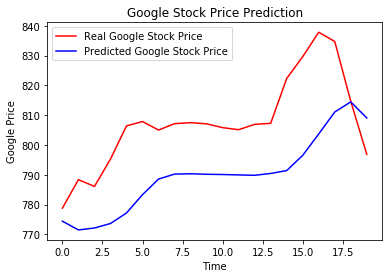

In [34]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')

plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')

plt.title('Google Stock Price Prediction')

plt.xlabel('Time')

plt.ylabel('Google Price')

plt.legend()

plt.show()

---------------------------